# <font color='#d50283'>IT Academy - Ciència de Dades (online)</font>
## Tasca M4 T01: Visualització gràfica de dades
### Juan Javier Hidalgo Gómez

****Descripció****  
Utilitzant les biblioteques de visualització de dades Matplotlib o Seaborn, realitza els següents exercicis.
 
****[!] RECORDA****

En la ciència de dades una de les tasques més importants és l'anàlisi. Una gràfica sempre ha d'anar acompanyada d'una explicació d'aquesta. Aporta informació.

### <font color='#d50283'>- Exercici 1</font>
Descarrega el dataset adjunt ***preu lloguer per trimestre i barri.csv*** extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)
- Dues variables numèriques (Any o Trimestre i Preu)
- Tres variables (Barri o Districte, Trimestre i Preu)

***En esta parte del Ejercicio se utiliza la librería matplotlib.***

****1.0 EDA (Análisis Exploratorio de Datos).****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline( ver las gráficas en el propio notebook)

#Variables genéricas:
path=r'c:/Users/Nitropc/DS_Sprint_04/Fuente de Datos/preu lloguer per trimestre i barri.csv'

#Funciones
# Intento de Mecanizar acciones/herramientas para el analisis de cualquier DataSet
# Guardar información de los pasos EDA

def GrabarFicheros (fichero,texto):
    ocurrencias=str.split(path,"/")
    duppath = ''
    for s in ocurrencias[:-1]:duppath += s + '/' 
    try:
        file=open(f"{duppath}{fichero}","a", encoding='utf-8')
        file.write(texto+"\n") 
    except IOError:
        file=open(f"{duppath}{fichero}","w", encoding='utf-8')
        file.write(texto+"\n")
    file.close()
        
# Eliminar las filas 

def Eliminar_duplicados(dfe):
    file="Duplicados.txt"
    # Número de registros del dataSet antes de eliminar.
    treg=dfe.duplicated().sum()
    df=dfe[dfe.duplicated(keep=False)]
    texto=f"Número de duplicados={treg}"
    GrabarFicheros(file,texto)
    texto=f"Filas Duplicadas={df}"
    GrabarFicheros(file,texto)
    if treg!=0:dfs=dfe.drop_duplicates()
    else: dfs=dfe
    file=""  
    #input("Please press the Enter key to proceed")
    return(dfs)
        

def Eliminar_Nulos(dfe):
    file="Nulos.txt"
    # Número de registros del dataSet antes de eliminar.
    treg=data.isnull().any(axis=1).sum()
    df=dfe[dfe.isnull().any(axis=1)]
    texto=f"Número de Nulos={treg}"
    GrabarFicheros(file,texto)
    texto=f"Filas Nulas={df}"
    GrabarFicheros(file,texto)
    #print(f'Resultado:\n Total de Duplicados={treg}')
    # eliminamos Filas con datos nulos
    #input("Please press the Enter key to proceed")
    if treg!=0:dfs=dfe.dropna(how='all')
    else: dfs=dfe
    file=""     
    
    return(dfs)


#Cuerpo 
data = pd.read_csv(path,delimiter=',')
print('Análisis Exploratorio de Datos(EDA):\nResultado:\n ')
print(f'Total de Registros {data.shape[0]}, Total de Columnas {data.shape[1]}.\n')

data=Eliminar_duplicados(data)
data=Eliminar_Nulos(data)

#print(f'Estudio Nulos:\n{data.isna().sum().sort_values(ascending = False)}')
print(f'Total de Registros una vez eliminados duplicados y Nulos {data.shape[0]}.\n')

Análisis Exploratorio de Datos(EDA):
Resultado:
 
Total de Registros 584, Total de Columnas 8.

Total de Registros una vez eliminados duplicados y Nulos 584.



In [2]:
data.head().T

,0,1,2,3,4
Any,2021,2021,2021,2021,2021
Trimestre,1,1,1,1,1
Codi_Districte,1,1,1,1,2
Nom_Districte,Ciutat Vella,Ciutat Vella,Ciutat Vella,Ciutat Vella,Eixample
Codi_Barri,1,2,3,4,5
Nom_Barri,el Raval,el Barri Gòtic,la Barceloneta,"Sant Pere, Santa Caterina i la Ribera",el Fort Pienc
Lloguer_mitja,Lloguer mitjà mensual (Euros/mes),Lloguer mitjà mensual (Euros/mes),Lloguer mitjà mensual (Euros/mes),Lloguer mitjà mensual (Euros/mes),Lloguer mitjà mensual (Euros/mes)
Preu,759.2,929.6,808.9,879.4,918.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


***Errores en la columna 'Preu', hay valores '--'***

In [4]:

# Realizamos diferentes cambios a las variables
Trimestre = {1:'T1',2:'T2',3:'T3',4:'T4'}
data['Trimestre'] = data['Trimestre'].map(Trimestre)

#Genera error tenemos una fila con valor data['Preu']="--"
#data[data['Preu']=='--'].count()
dfe=data[data['Preu']=='--']
print(f"Total de errores en columna ['Preu']= {dfe['Preu'].value_counts()}")


#Eliminamos los registros con 'Preu'='--'
#Otra posibilidad, sería sustituir el valor '--' por la mediana que hay por distrito
#data['Preu'].value_counts()['--']
data[data['Preu']=='--'].count()
data.drop(data[data['Preu']=='--'].index, inplace= True)

#Otra forma, podemos cambiar la columna evitando los signos.
#data['Preu']=pd.to_numeric(data['Preu'], errors='coerce')

#Cambiamos el tipo de la variable a 'float'

data['Preu']=data['Preu'].astype(float)

Total de errores en columna ['Preu']= --    44
Name: Preu, dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    object 
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 38.0+ KB


In [6]:
# En la columna Lloguer_mitja, tenemos dos elementos que nos sirven de filtro para la columna
# 'Preu' , los valores 'Lloguer mitjà mensual' y el valor Lloguer mitjà per superfície (Euros/m2 mes)

data['Lloguer_mitja'].value_counts()


Lloguer mitjà mensual (Euros/mes)              270
Lloguer mitjà per superfície (Euros/m2 mes)    270
Name: Lloguer_mitja, dtype: int64

In [7]:
# Se crea un dataframe con el Lloguer mitjà per superfície (Euros/m2 mes)'
df_m2 = data.drop(data[data['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'].index)

# Renombramos columnas.
df_m2.rename(columns = {'Lloguer_mitja' : 'Alquiler_Superficie', 'Preu' : 'Precio_Superficie'}, inplace = True )
df_m2.head(2)


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Alquiler_Superficie,Precio_Superficie
73,2021,T1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,T1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3


In [8]:
# Se crea un dataframe con el Lloguer mitjà mensual (Euros/mes)'
df_mensual = data.drop(data[data['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'].index)
df_mensual.head(2)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,T1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,T1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6


In [9]:
df_final= pd.merge(df_m2,df_mensual)
df_final.head().T

,0,1,2,3,4
Any,2021,2021,2021,2021,2021
Trimestre,T1,T1,T1,T1,T1
Codi_Districte,1,1,1,1,2
Nom_Districte,Ciutat Vella,Ciutat Vella,Ciutat Vella,Ciutat Vella,Eixample
Codi_Barri,1,2,3,4,5
Nom_Barri,el Raval,el Barri Gòtic,la Barceloneta,"Sant Pere, Santa Caterina i la Ribera",el Fort Pienc
Alquiler_Superficie,Lloguer mitjà per superfície (Euros/m2 mes),Lloguer mitjà per superfície (Euros/m2 mes),Lloguer mitjà per superfície (Euros/m2 mes),Lloguer mitjà per superfície (Euros/m2 mes),Lloguer mitjà per superfície (Euros/m2 mes)
Precio_Superficie,12.8,12.3,15.5,13.3,12.9
Lloguer_mitja,Lloguer mitjà mensual (Euros/mes),Lloguer mitjà mensual (Euros/mes),Lloguer mitjà mensual (Euros/mes),Lloguer mitjà mensual (Euros/mes),Lloguer mitjà mensual (Euros/mes)
Preu,759.2,929.6,808.9,879.4,918.0


In [10]:
df_final[['Preu','Precio_Superficie']].describe().round(3)

,Preu,Precio_Superficie
count,270.000,270.000
mean,871.594,12.721
std,221.193,1.701
min,447.500,6.700
25%,742.475,11.625
50%,816.350,12.750
75%,934.525,13.600
max,1816.500,18.000


****1.1 Una variable categòrica (Districte o Barri)****

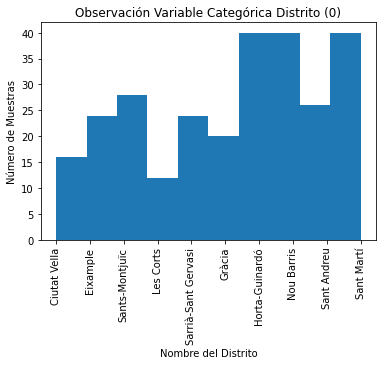

In [11]:
# Varias tipos de gráfica para expresar lo mismo.

x = df_final['Nom_Districte']
plt.xlabel('Nombre del Distrito')
plt.ylabel('Número de Muestras')
Titulo='Observación Variable Categórica Distrito (0)'
plt.title(Titulo)
plt.xticks(rotation=90)

plt.hist(x)
plt.savefig(f"{Titulo}.jpg")
plt.show() 

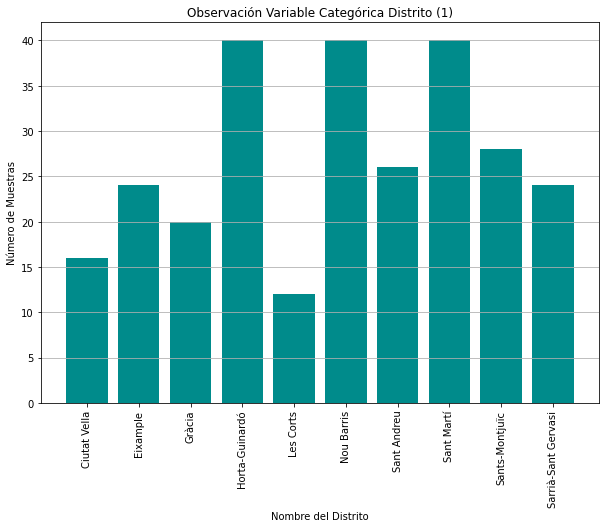

In [12]:
Recuento=df_final.groupby('Nom_Districte').Nom_Districte.count()

fig = plt.figure(figsize = (10, 7))
plt.bar(Recuento.index,Recuento, color = '#008B8B')
plt.xlabel('Nombre del Distrito')
plt.ylabel('Número de Muestras')
plt.xticks(rotation=90)
Titulo='Observación Variable Categórica Distrito (1)'
plt.title(Titulo)
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.title(Titulo)
plt.savefig(f"{Titulo}.jpg")

plt.show()

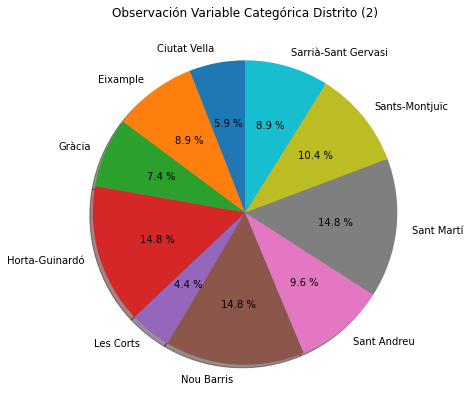

In [13]:
Recuento=df_final.groupby('Nom_Districte').Nom_Districte.count()

fig = plt.figure(figsize = (10, 7))
plt.pie(Recuento,labels =Recuento.index,autopct='%1.1f %%', startangle = 90, shadow = True)


Titulo='Observación Variable Categórica Distrito (2)'
plt.title(Titulo)
#plt.grid(axis='y')
plt.title(Titulo)
plt.savefig(f"{Titulo}.jpg")

plt.show()

****1.2 Una variable numèrica (Preu)****

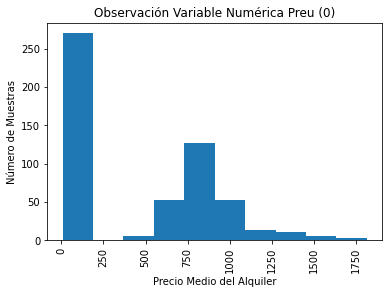

In [14]:
x = data['Preu']
plt.xlabel('Precio Medio del Alquiler')
plt.ylabel('Número de Muestras')
Titulo='Observación Variable Numérica Preu (0)'
plt.title(Titulo)
plt.xticks(rotation=90)
plt.hist(x)

plt.savefig(f"{Titulo}.jpg")
plt.show() 

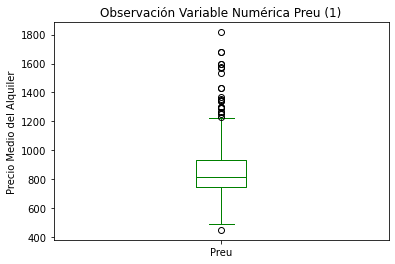

In [15]:
plt.xlabel('')
plt.ylabel('Precio Medio del Alquiler')
Titulo='Observación Variable Numérica Preu (1)'
plt.title(Titulo)
df_final["Preu"].plot.box(
    color="green",
)

plt.savefig(f"{Titulo}.jpg")

****1.3 Una variable numèrica i una categòrica (Districte i Preu)****

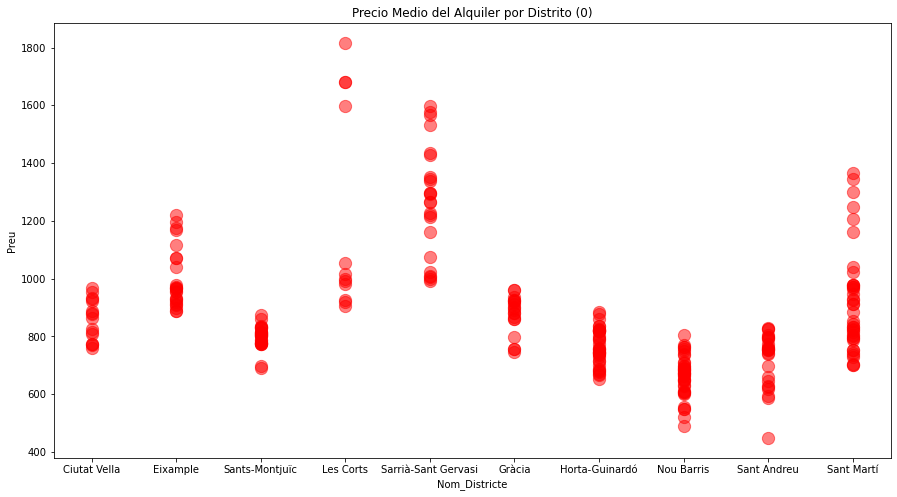

In [19]:
Titulo="Precio Medio del Alquiler por Distrito (0)"

df_final.plot.scatter(
    x="Nom_Districte", 
    y="Preu", 
    alpha=0.5, 
    figsize=(15,8), 
    c="red", 
    s=150)
plt.title(Titulo)
# Exercici 2 exporto gràfic com a imatge
plt.savefig(f"{Titulo}.jpg")


****1.4 Dues variables numèriques (Any o Trimestre i Preu)****

Trimestre
T1    869.30
T2    851.91
T3    880.79
T4    884.47
Name: Preu, dtype: float64


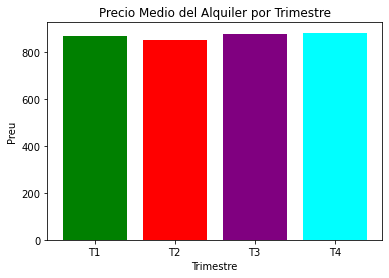

In [20]:
Titulo="Precio Medio del Alquiler por Trimestre"
df_dosvar = df_final.groupby(['Trimestre'])['Preu'].mean()
print(df_dosvar.round(2))
plt.title(Titulo)
plt.xlabel('Trimestre')
plt.ylabel('Preu')

plt.bar(df_dosvar.index,df_dosvar
        ,color=['green','red','purple','cyan']
        )
plt.savefig(f"{Titulo}.jpg")

****1.5 Tres variables (Barri o Districte, Trimestre i Preu)****

#### Conocer el precio por trimestre y Districto
#### La gráfica con esta petición, el eje de las x no se visualiza bien.

    df_groupby = df_final.groupby(['Nom_Districte','Trimestre'])['Preu'].mean()
    df_groupby.plot.bar(
                        color=['green','red','purple','cyan'],
                        ylabel='Preu'
                        )
    plt.show()


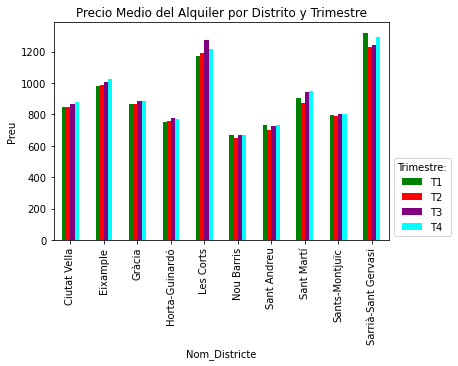

In [21]:
# utilizamos función crosstab
Titulo="Precio Medio del Alquiler por Distrito y Trimestre"

df_tresvar= pd.crosstab(df_final['Nom_Districte'],df_final['Trimestre'], values=df_final.Preu, aggfunc=np.mean)

df_tresvar.plot.bar(color=['green','red','purple','cyan']
                    ,ylabel='Preu'
                   )
plt.title(Titulo)
plt.legend(title='Trimestre:',bbox_to_anchor = (1, 0.4)) 
plt.savefig(f"{Titulo}.jpg",bbox_inches='tight')



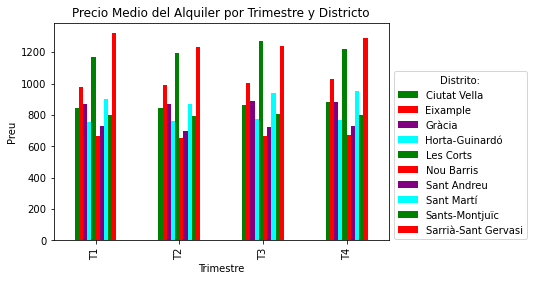

In [22]:
Titulo="Precio Medio del Alquiler por Trimestre y Districto"

df_tresvar= pd.crosstab(df_final['Trimestre'],df_final['Nom_Districte'], values=df_final.Preu, aggfunc=np.mean)

df_tresvar.plot.bar(
                color=['green','red','purple','cyan'],
                ylabel='Preu'
                    )
plt.title(Titulo)
plt.legend(title='Distrito:',bbox_to_anchor = ((1, 0.8)),loc='upper left') 
plt.savefig(f"{Titulo}.jpg",bbox_inches='tight')


### <font color='#d50283'>- Exercici 2</font>  
Exporta els gràfics com imatges o com HTML.

Se crea en el ejercicio anterior una salida para cada una de las gráficas.  
- Estructura:   
     Titulo= ***Título de la gráfica***
     .  
     .  
     .  
     plt.title(Titulo)  
     plt.savefig(f"{Titulo}.jpg")   
    
***Nota***   
En las dos últimas gráficas he tenido que cambiar el orden de plt.title(Titulo), despues función plot.bar, no se presentaba.

### <font color='#d50283'>- Exercici 3</font>  
Proposa alguna visualització que creguis que pot resultar interessant.

***En esta parte del Ejercicio se utiliza la librería seaborn***

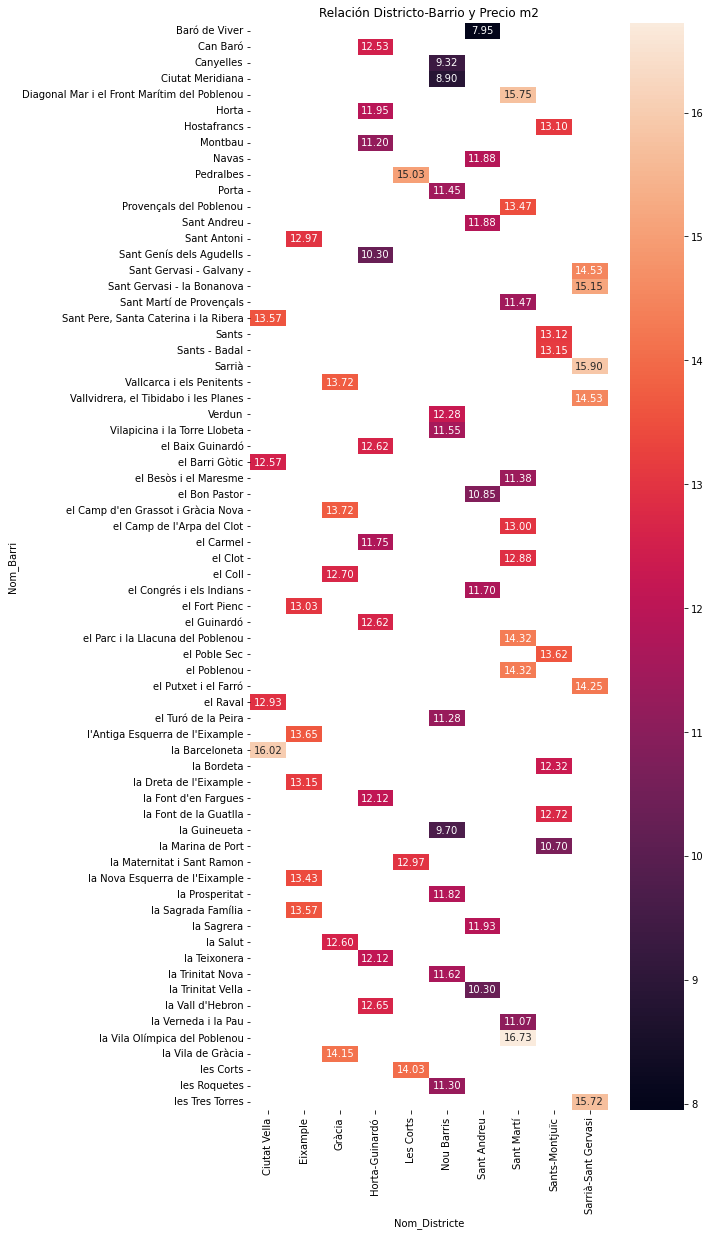

In [23]:
# Mapa de calor del precio por m2
plt.figure(figsize=(8, 20))
df_calor= pd.crosstab(df_final['Nom_Barri'],df_final['Nom_Districte'], values=df_final.Precio_Superficie, aggfunc=np.mean, dropna=True)
Titulo='Relación Districto-Barrio y Precio m2'

graf1=sns.heatmap(df_calor, annot = True,fmt=".2f").set(title=Titulo)


plt.savefig(f"{Titulo}.jpg",bbox_inches='tight')
plt.show()

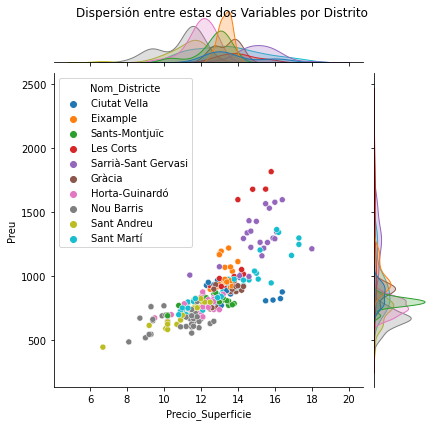

In [54]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
Titulo='Dispersión entre estas dos Variables por Distrito'
#graf2=sns.jointplot(df_final['Precio_Superficie'],df_final['Preu'], kind="reg")
graf2=sns.jointplot(data = df_final, x='Precio_Superficie',y='Preu', hue='Nom_Districte')
graf2.fig.suptitle(Titulo)
plt.savefig(f"{Titulo}.jpg",bbox_inches='tight')
plt.show()



***Análizamos la gráfica***

- ***Les Corts***: Tiene dos conjuntos visibles en rojo, uno de ellos estan dentro conjunto general, pero tiene un conjunto que destaca por su dispersión respecto al general.
- ***Eixample***: Tiene un comportamiento más parecido entre sus diferentes valores.
- ***Sant Marti***: Tiene un comportamiento más lineal, aunque tiene valores también bastante dispersos.  

***Análizamos estos tres districtos, con tablas***

In [46]:
# calculamos el coeficiente de correlación de estos dos vectores.
print(df_final[['Preu','Precio_Superficie']].describe().round(3),"\n")
coor=df_final[['Precio_Superficie','Preu']].corr()
print(coor,"\n")
print('Tiene una asociación alta estas dos variables Precio_Superficie y Preu\n')
# Tiene una asociación alta estas dos variables 'Precio_Superficie','Preu'

d_std=df_final.groupby('Nom_Districte').agg(sepal_length_sd=('Precio_Superficie', "std"))
print(d_std.sort_values(by="sepal_length_sd",ascending=False))
#Sant Marti está más disperso y Eixamples son menos dispersos(más parecidos)
print('\nSant Marti(Barrios) los valores están más disperso, Eixamples(Barrios) son menos dispersos(más parecidos) y aunque Les Corts tiene los 4 valores más dispersos, ocuparía el ranking 6')
#Análizamos Eixample
# Valores menos dispersos

#Análizamos Eixample
# Valores menos dispersos

LesCorts= df_final[df_final['Nom_Districte']=='Les Corts']
print('\nAnálisis de Les Corts:')
ei_std=LesCorts.groupby('Nom_Barri').agg(sepal_length_sd=('Precio_Superficie', "std"))
print(ei_std.sort_values(by="sepal_length_sd",ascending=False))

Eixample= df_final[df_final['Nom_Districte']=='Eixample']
print('\nAnálisis de Eixample:')
ei_std=Eixample.groupby('Nom_Barri').agg(sepal_length_sd=('Precio_Superficie', "std"))
print(ei_std.sort_values(by="sepal_length_sd",ascending=False))

#Análizamos Sant Marti
# Valores más dispersos
SantMarti= df_final[df_final['Nom_Districte']=='Sant Martí']
print('\nAnálisis de Sant Marti:')
sm_std=SantMarti.groupby('Nom_Barri').agg(sepal_length_sd=('Precio_Superficie', "std"))
print(sm_std.sort_values(by="sepal_length_sd",ascending=False))



           Preu  Precio_Superficie
count   270.000            270.000
mean    871.594             12.721
std     221.193              1.701
min     447.500              6.700
25%     742.475             11.625
50%     816.350             12.750
75%     934.525             13.600
max    1816.500             18.000 

                   Precio_Superficie      Preu
Precio_Superficie           1.000000  0.771044
Preu                        0.771044  1.000000 

Tiene una asociación alta estas dos variables Precio_Superficie y Preu

                     sepal_length_sd
Nom_Districte                       
Sant Martí                  1.855664
Ciutat Vella                1.417274
Sarrià-Sant Gervasi         1.265362
Sant Andreu                 1.215971
Nou Barris                  1.160788
Les Corts                   0.994949
Sants-Montjuïc              0.950383
Horta-Guinardó              0.810567
Gràcia                      0.661418
Eixample                    0.353861

Sant Marti(Barrios) los

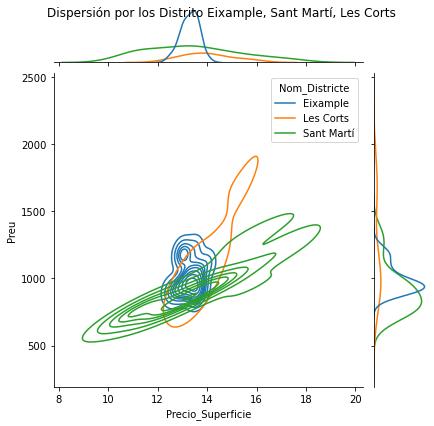

In [56]:
#graf3=sns.jointplot(Eixample['Nom_Barri'],Eixample['Precio_Superficie'])
#sns.displot(data=Eixample, x="Precio_Superficie", hue="Nom_Barri",col="Nom_Barri")
# plt.show()
#estudio=df_final[df_final['Nom_Districte']=='Eixample' & df_final['Nom_Districte']=='Sant Marti']
Titulo='Dispersión por los Distrito Eixample, Sant Martí, Les Corts'
estudio=df_final.query('Nom_Districte in ["Eixample", "Sant Martí", "Les Corts"]')
estudio
#graf2=sns.jointplot(estudio['Precio_Superficie'],estudio['Preu'], kind="reg")
graf2=sns.jointplot(data = estudio, x='Precio_Superficie',y='Preu', hue='Nom_Districte',kind="kde")
graf2.fig.suptitle(Titulo)
plt.savefig(f"{Titulo}.jpg",bbox_inches='tight')